In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('PurchaseDataQuiz.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


### 1. Handling missing data

In [4]:
data.isnull().sum()

User ID            0
Gender             2
Age                3
EstimatedSalary    2
Purchased          0
dtype: int64

In [5]:
data = data.fillna(method='pad')
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

### 2. Handling outliers

<AxesSubplot:xlabel='EstimatedSalary'>

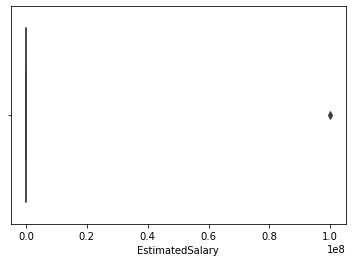

In [6]:
import seaborn as sns
sns.boxplot(x=data['EstimatedSalary'])

In [7]:
from sklearn.preprocessing import StandardScaler
data['EstimatedSalary']=StandardScaler().fit_transform(data.loc[: ,['EstimatedSalary']].values)

In [8]:
data.head()
data.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,-0.055796,1
396,15706071,Male,51.0,-0.059403,1
397,15654296,Female,50.0,-0.060004,1
398,15755018,Male,36.0,-0.057399,0
399,15594041,Female,49.0,19.974515,1


In [9]:
#taking threshold
threshold = 2.5
data = data[data['EstimatedSalary']<=threshold]

<AxesSubplot:xlabel='EstimatedSalary'>

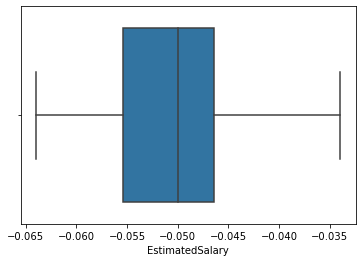

In [10]:
import seaborn as sns
sns.boxplot(x=data['EstimatedSalary'])

In [11]:
# one row with the outlier data removed
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,-0.060204,0
1,15810944,Male,35.0,-0.060004,0
2,15668575,Female,26.0,-0.055395,0
3,15603246,Female,27.0,-0.052590,0
4,15804002,Male,19.0,-0.048782,0
...,...,...,...,...,...
394,15757632,Female,39.0,-0.052189,0
395,15691863,Female,46.0,-0.055796,1
396,15706071,Male,51.0,-0.059403,1
397,15654296,Female,50.0,-0.060004,1


### 3. Binning

In [12]:
#performing binning on the age column
print(data.Age.max())
print(data.Age.min())

60.0
18.0


In [13]:
ages = data
ages['age_bins'] = pd.cut(x=data['Age'], bins=[18, 29, 39, 49, 60])
ages.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_bins
0,15624510,Male,19.0,-0.060204,0,"(18, 29]"
1,15810944,Male,35.0,-0.060004,0,"(29, 39]"
2,15668575,Female,26.0,-0.055395,0,"(18, 29]"
3,15603246,Female,27.0,-0.052590,0,"(18, 29]"
4,15804002,Male,19.0,-0.048782,0,"(18, 29]"


In [14]:
ages['age_bins'].unique()

[(18.0, 29.0], (29.0, 39.0], NaN, (39.0, 49.0], (49.0, 60.0]]
Categories (4, interval[int64]): [(18, 29] < (29, 39] < (39, 49] < (49, 60]]

In [15]:
ages['age_by_decade'] = pd.cut(x=ages['Age'], bins=[18, 29, 39, 49, 60], labels=['20s', '30s', '40s' , '50s' ])
ages.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_bins,age_by_decade
0,15624510,Male,19.0,-0.060204,0,"(18, 29]",20s
1,15810944,Male,35.0,-0.060004,0,"(29, 39]",30s
2,15668575,Female,26.0,-0.055395,0,"(18, 29]",20s
3,15603246,Female,27.0,-0.052590,0,"(18, 29]",20s
4,15804002,Male,19.0,-0.048782,0,"(18, 29]",20s


### 4. Log Transform

In [16]:
data_log = data
data_log['log(x+1)'] = (data_log['Age']+1).transform(np.log)
data_log.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_bins,age_by_decade,log(x+1)
0,15624510,Male,19.0,-0.060204,0,"(18, 29]",20s,2.995732
1,15810944,Male,35.0,-0.060004,0,"(29, 39]",30s,3.583519
2,15668575,Female,26.0,-0.055395,0,"(18, 29]",20s,3.295837
3,15603246,Female,27.0,-0.052590,0,"(18, 29]",20s,3.332205
4,15804002,Male,19.0,-0.048782,0,"(18, 29]",20s,2.995732


In [17]:
print(data_log.min())
print(data_log.max())

User ID            15566689
Gender               Female
Age                    18.0
EstimatedSalary   -0.063996
Purchased                 0
age_bins           (18, 29]
age_by_decade           20s
log(x+1)           2.944439
dtype: object
User ID            15815236
Gender                 Male
Age                    60.0
EstimatedSalary   -0.033954
Purchased                 1
age_bins           (49, 60]
age_by_decade           50s
log(x+1)           4.110874
dtype: object


In [18]:
data['Age'] = (data['Age']+1).transform(np.log)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,age_bins,age_by_decade,log(x+1)
0,15624510,Male,2.995732,-0.060204,0,"(18, 29]",20s,2.995732
1,15810944,Male,3.583519,-0.060004,0,"(29, 39]",30s,3.583519
2,15668575,Female,3.295837,-0.055395,0,"(18, 29]",20s,3.295837
3,15603246,Female,3.332205,-0.052590,0,"(18, 29]",20s,3.332205
4,15804002,Male,2.995732,-0.048782,0,"(18, 29]",20s,2.995732


### 5. One-Hot Encoding

In [19]:
gender =pd.DataFrame({'Gender': data['Gender'].values })
gender.head()

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male


In [20]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(gender)
X_ohe = ohe.transform(gender).toarray()

In [21]:
ohe_df = pd.DataFrame(X_ohe, columns=ohe.get_feature_names(gender.columns))
ohe_df.head()

,Gender_Female,Gender_Male
0,0.0,1.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


### 6. Aggregations / Group Statistics

In [22]:
salary=pd.DataFrame({'Gender': data['Gender'].values, 
                     'Estimated_Salary': data['EstimatedSalary'].values })
salary.head()

,Gender,Estimated_Salary
0,Male,-0.060204
1,Male,-0.060004
2,Female,-0.055395
3,Female,-0.052590
4,Male,-0.048782


In [23]:
degree_mean=salary.groupby('Gender').mean().rename(columns={'Estimated_Salary':'Salary_mean_by_degree'})
degree_mean

,Salary_mean_by_degree
Gender,
Female,-0.049613
Male,-0.050522


In [24]:
degree_std=salary.groupby('Gender').std().rename(columns={'Estimated_Salary':'Salary_std_by_degree'})
degree_std

,Salary_std_by_degree
Gender,
Female,0.007189
Male,0.006516


In [25]:
salary=pd.merge(pd.merge(salary, degree_mean, on='Gender'), degree_std, on='Gender')
salary.head()

,Gender,Estimated_Salary,Salary_mean_by_degree,Salary_std_by_degree
0,Male,-0.060204,-0.050522,0.006516
1,Male,-0.060004,-0.050522,0.006516
2,Male,-0.048782,-0.050522,0.006516
3,Male,-0.052389,-0.050522,0.006516
4,Male,-0.057399,-0.050522,0.006516


In [26]:
salary['Salary_level']=(salary['Estimated_Salary']-salary['Salary_mean_by_degree'])/salary['Salary_std_by_degree']
salary.head()

,Gender,Estimated_Salary,Salary_mean_by_degree,Salary_std_by_degree,Salary_level
0,Male,-0.060204,-0.050522,0.006516,-1.486075
1,Male,-0.060004,-0.050522,0.006516,-1.455320
2,Male,-0.048782,-0.050522,0.006516,0.266960
3,Male,-0.052389,-0.050522,0.006516,-0.286630
4,Male,-0.057399,-0.050522,0.006516,-1.055505


### 7. Scaling

In [27]:
data = pd.DataFrame({'value': data['EstimatedSalary'].values})
data['standardized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())

In [28]:
data.head()

,value,standardized
0,-0.060204,0.126201
1,-0.060004,0.132871
2,-0.055395,0.286286
3,-0.052590,0.379669
4,-0.048782,0.506403


In [29]:
data = pd.read_csv('PurchaseDataQuiz.csv')
data = data.fillna(method='pad')
from sklearn.preprocessing import StandardScaler
data['EstimatedSalary']=StandardScaler().fit_transform(data.loc[: ,['EstimatedSalary']].values)
data['Gender'].replace('Female',0,inplace=True)
data['Gender'].replace('Male',1,inplace=True)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19.0,-0.060204,0
1,15810944,1,35.0,-0.060004,0
2,15668575,0,26.0,-0.055395,0
3,15603246,0,27.0,-0.052590,0
4,15804002,1,19.0,-0.048782,0


In [30]:
X = data[['Gender','Age','EstimatedSalary']]
y = data['Purchased']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss
from numpy import log
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [32]:
predictions = logmodel.predict(X_test)
predictions

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [33]:
probs_y=logmodel.predict_proba(X_test) 

In [34]:
y_test

38     0
387    0
270    0
181    0
195    0
      ..
228    0
178    0
267    0
147    0
230    1
Name: Purchased, Length: 120, dtype: int64

In [35]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline 

In [36]:
cm = confusion_matrix(y_test, predictions)
cm

array([[75,  5],
       [11, 29]], dtype=int64)

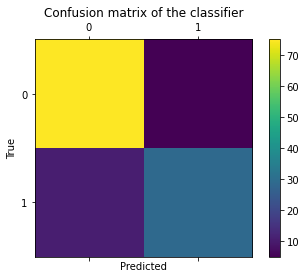

In [37]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

AUC - Test Set: 83.12%


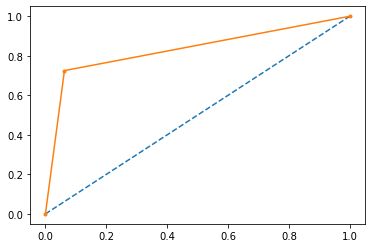

In [40]:
from sklearn.metrics import roc_auc_score, roc_curve

# keep probabilities for the positive outcome only
#probs = pred[:, 1]

auc = roc_auc_score(y_test, predictions)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()